In [46]:
import geopandas as gp
import matplotlib.pyplot as plt
import pandas as pd
import shapely.wkt

#%matplotlib inline

In [8]:
'''Import Data'''
shp = gp.read_file("../Natural_Gas_Interstate_and_Intrastate_Pipelines/Natural_Gas_Interstate_and_Intrastate_Pipelines.shp")
us = gp.read_file("../tl_2017_us_state/tl_2017_us_state.shp")
plants = pd.read_excel('../Output_Excel/Arizona_Info.xlsx')

us.crs = {'init': 'epsg: 4326'}

In [53]:
'''Convert plants dataframe to geospatial dataframe'''
plants_geo = gp.GeoDataFrame(plants, geometry=gp.points_from_xy(plants.Longitude,
                                                               plants.Latitude))
plants_geo.crs = {'init': 'epsg: 4326'}

In [3]:
'''Select United State States'''
us = us.loc[~us['NAME'].isin(['Alaska', 'Hawaii'])]
AZ = us.loc[us['NAME'] == 'Arizona']
NM = us.loc[us['NAME'] == 'New Mexico']
TX = us.loc[us['NAME'] == 'Texas']
CO = us.loc[us['NAME'] == 'Colorado']

In [4]:
'''Select Pipelines relevant to Arizona'''
ElPasoNGC = shp.loc[shp['Operator'] == 'El Paso Natural Gas Co']
TransWGC = shp.loc[shp['Operator'] == 'Transwestern Gas Co']
QuestarSTL = shp.loc[shp['Operator'] == 'Questar Southern Trails Line']

Text(156.375, 0.5, 'Latitude')

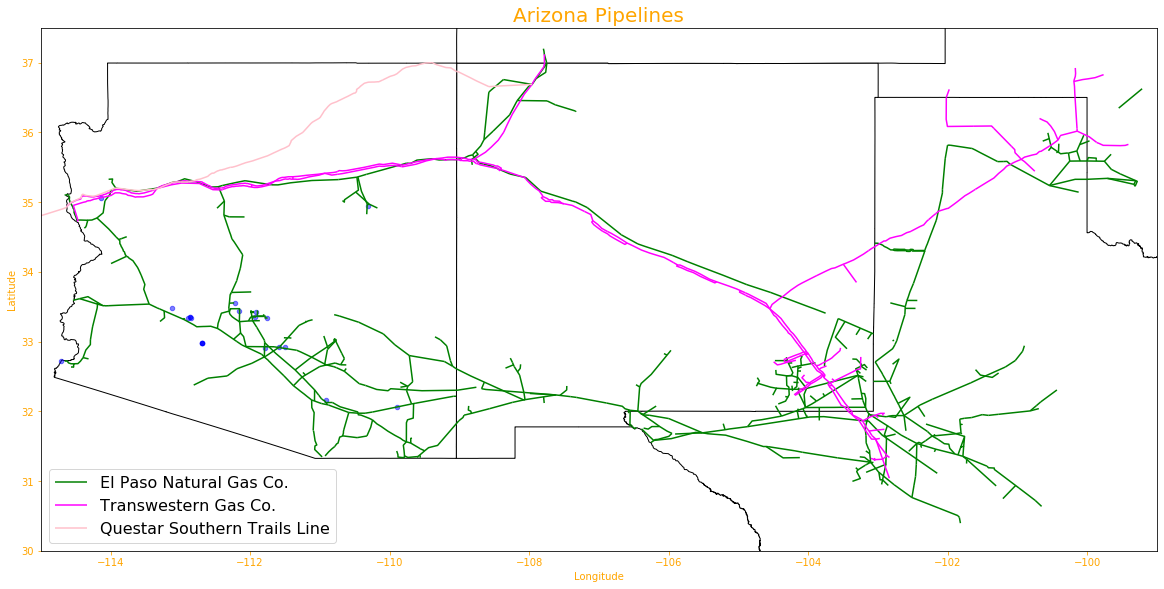

In [57]:
'''Plot Data'''
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.set_xlim(-115, -99)
ax.set_ylim(30, 37.5)

base = NM.plot(ax=ax, color='white', edgecolor='black')
case = TX.plot(ax=ax, color='white', edgecolor='black')
dase = AZ.plot(ax=ax, color='white', edgecolor='black')
ease = CO.plot(ax=ax, color='white', edgecolor='black')
ElPasoNGC.plot(ax=base, color='green', label='El Paso Natural Gas Co.')
TransWGC.plot(ax=base, color='magenta', label='Transwestern Gas Co.')
QuestarSTL.plot(ax=base, color = 'pink', label='Questar Southern Trails Line')
plants_geo.plot(markersize=20, color='blue', alpha=0.5, ax=ax)

ax.set_title('Arizona Pipelines', color='orange', size='20')
legend = ax.legend(loc='lower left', prop={'size': 16})
ax.tick_params(axis='x', colors='orange')
ax.tick_params(axis='y', colors='orange')
ax.set_xlabel('Longitude', color='orange')
ax.set_ylabel('Latitude', color='orange')